In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load all CSV files
df1 = pd.read_csv(r"C:\sachin\Python\Final_Code\Learning\student_engagement.csv")
df2 = pd.read_csv(r"C:\sachin\Python\Final_Code\Learning\student_performance_dataset.csv")
df3 = pd.read_csv(r"C:\sachin\Python\Final_Code\Learning\StudentsPerformance (1).csv")

# Merge them using union (ignores different columns, fills missing with NaN)
merged_df = pd.concat([df1, df2, df3], ignore_index=True, sort=False)

# Save the merged file (optional)
merged_df.to_csv("merged_output.csv", index=False)


In [3]:
df = merged_df

In [4]:
df.head()

,time_spent_weekly,quiz_score_avg,forum_posts,video_watched_percent,assignments_submitted,login_frequency,session_duration_avg,device_type,course_difficulty,region,...,Final_Exam_Score,Pass_Fail,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,349.671415,90.990332,1.0,20.797539,4.0,2.0,51.300257,Desktop,Easy,Suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,286.173570,83.869505,1.0,26.781292,5.0,4.0,47.760362,Desktop,Medium,Urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,364.768854,70.894456,4.0,84.610070,1.0,11.0,62.805734,Mobile,Easy,Rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452.302986,60.295948,1.0,81.717868,9.0,2.0,37.976527,Mobile,Medium,Suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,276.584663,80.473350,3.0,93.211106,9.0,4.0,43.212184,Desktop,Easy,Suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time_spent_weekly            1000 non-null   float64
 1   quiz_score_avg               1000 non-null   float64
 2   forum_posts                  1000 non-null   float64
 3   video_watched_percent        1000 non-null   float64
 4   assignments_submitted        1000 non-null   float64
 5   login_frequency              1000 non-null   float64
 6   session_duration_avg         1000 non-null   float64
 7   device_type                  1000 non-null   object 
 8   course_difficulty            1000 non-null   object 
 9   region                       1000 non-null   object 
 10  engagement_level             1000 non-null   object 
 11  Student_ID                   708 non-null    object 
 12  Gender                       708 non-null    object 
 13  Study_Hours_per_We

In [6]:
df.dtypes

time_spent_weekly              float64
quiz_score_avg                 float64
forum_posts                    float64
video_watched_percent          float64
assignments_submitted          float64
login_frequency                float64
session_duration_avg           float64
device_type                     object
course_difficulty               object
region                          object
engagement_level                object
Student_ID                      object
Gender                          object
Study_Hours_per_Week           float64
Attendance_Rate                float64
Past_Exam_Scores               float64
Parental_Education_Level        object
Internet_Access_at_Home         object
Extracurricular_Activities      object
Final_Exam_Score               float64
Pass_Fail                       object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course  

### Handle the missing values 

In [7]:
# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0]  # Most frequent value
        df[col].fillna(mode_val, inplace=True)
    else:
        mean_val = df[col].mean()     # Average value
        df[col].fillna(mean_val, inplace=True)

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_10328\1840445322.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_10328\1840445322.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [8]:
df.isnull().sum()

time_spent_weekly              0
quiz_score_avg                 0
forum_posts                    0
video_watched_percent          0
assignments_submitted          0
login_frequency                0
session_duration_avg           0
device_type                    0
course_difficulty              0
region                         0
engagement_level               0
Student_ID                     0
Gender                         0
Study_Hours_per_Week           0
Attendance_Rate                0
Past_Exam_Scores               0
Parental_Education_Level       0
Internet_Access_at_Home        0
Extracurricular_Activities     0
Final_Exam_Score               0
Pass_Fail                      0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### filling the missing values 

In [9]:
df.nunique()

time_spent_weekly               997
quiz_score_avg                  972
forum_posts                      11
video_watched_percent          1001
assignments_submitted            11
login_frequency                  16
session_duration_avg            994
device_type                       3
course_difficulty                 3
region                            3
engagement_level                  3
Student_ID                      500
Gender                            2
Study_Hours_per_Week             31
Attendance_Rate                 501
Past_Exam_Scores                 52
Parental_Education_Level          4
Internet_Access_at_Home           2
Extracurricular_Activities        2
Final_Exam_Score                 28
Pass_Fail                         2
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       82
reading score               

In [10]:
df.dtypes

time_spent_weekly              float64
quiz_score_avg                 float64
forum_posts                    float64
video_watched_percent          float64
assignments_submitted          float64
login_frequency                float64
session_duration_avg           float64
device_type                     object
course_difficulty               object
region                          object
engagement_level                object
Student_ID                      object
Gender                          object
Study_Hours_per_Week           float64
Attendance_Rate                float64
Past_Exam_Scores               float64
Parental_Education_Level        object
Internet_Access_at_Home         object
Extracurricular_Activities      object
Final_Exam_Score               float64
Pass_Fail                       object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course  

### labelEncoder

In [11]:
# Identify object (categorical) columns
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

### correlation

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                             time_spent_weekly  quiz_score_avg  forum_posts  \
time_spent_weekly                 1.000000e+00   -4.445138e-02    -0.036530   
quiz_score_avg                   -4.445138e-02    1.000000e+00     0.011342   
forum_posts                      -3.652996e-02    1.134184e-02     1.000000   
video_watched_percent            -2.783226e-02    1.433571e-02     0.051578   
assignments_submitted             4.703990e-02    2.046091e-02    -0.048286   
login_frequency                   3.134374e-02   -2.701943e-03    -0.025050   
session_duration_avg              4.109029e-02   -1.580918e-02    -0.053726   
device_type                      -2.642159e-02   -1.964074e-02     0.007108   
course_difficulty                 1.591149e-03    2.458602e-03    -0.007869   
region                            2.281687e-02    2.424986e-02     0.007694   
engagement_level                  1.276561e-01    2.968901e-01     0.099639   
Student_ID                       -4.333994e-17    3.

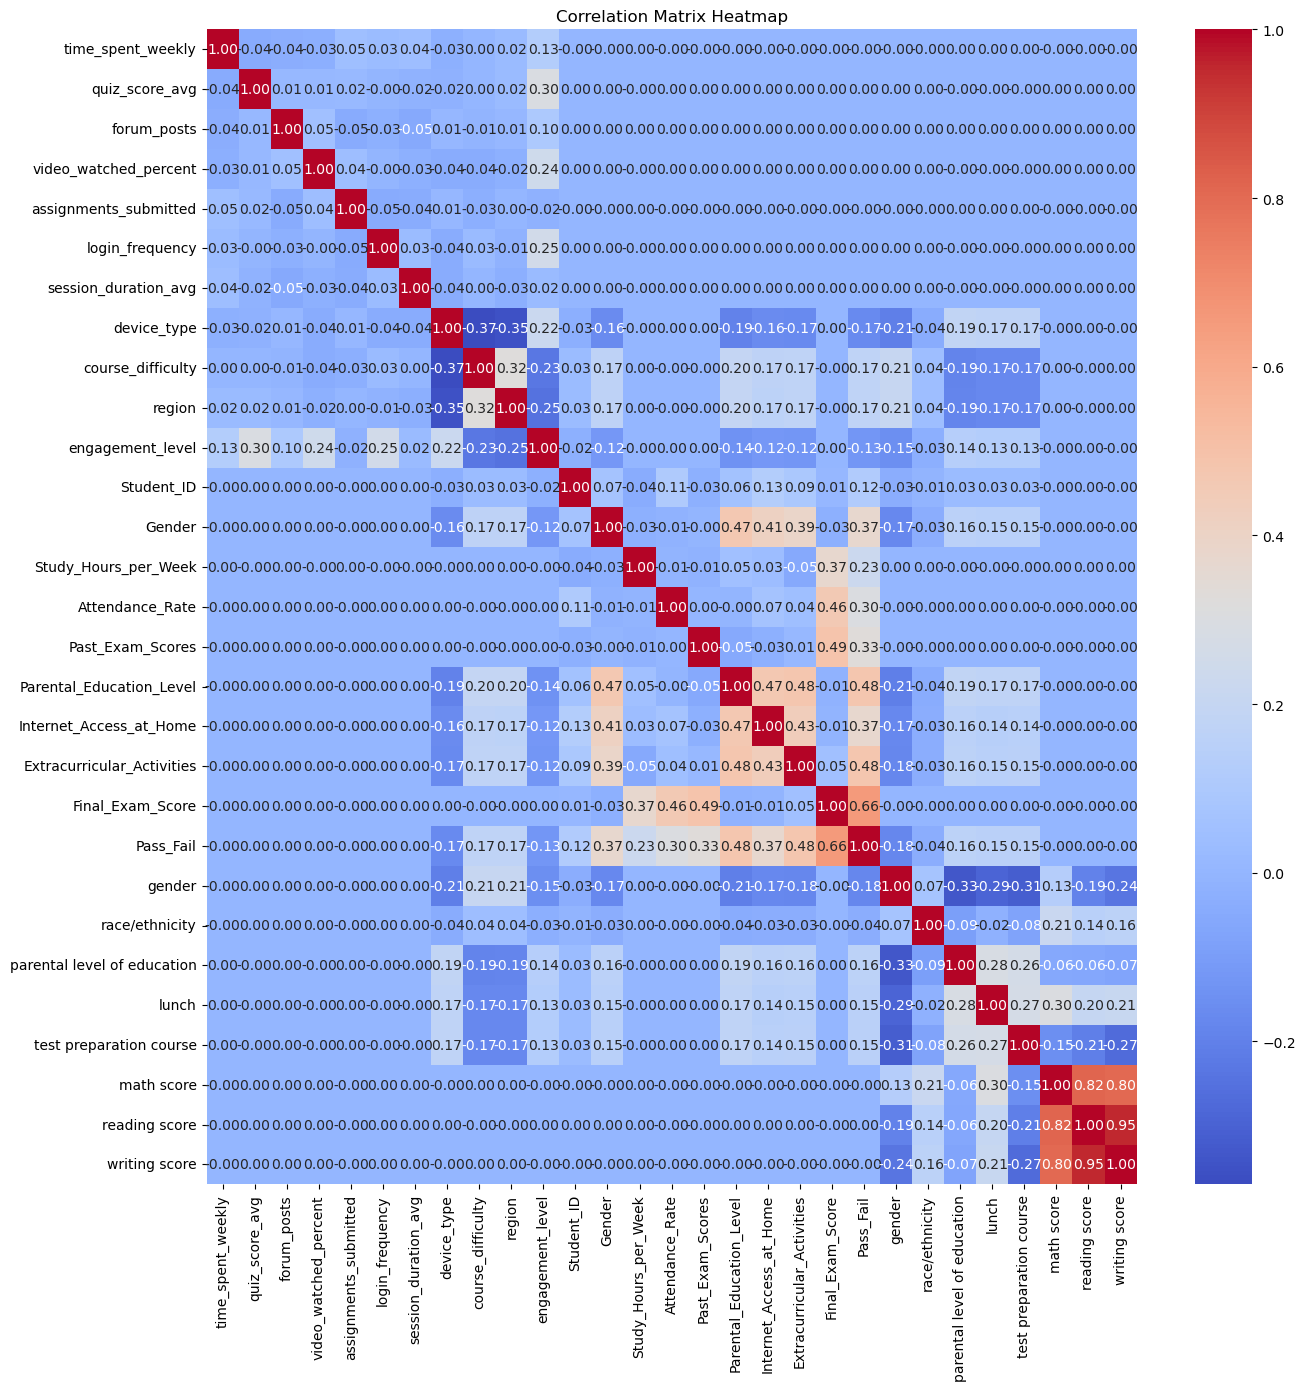

In [13]:
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Check the outlier

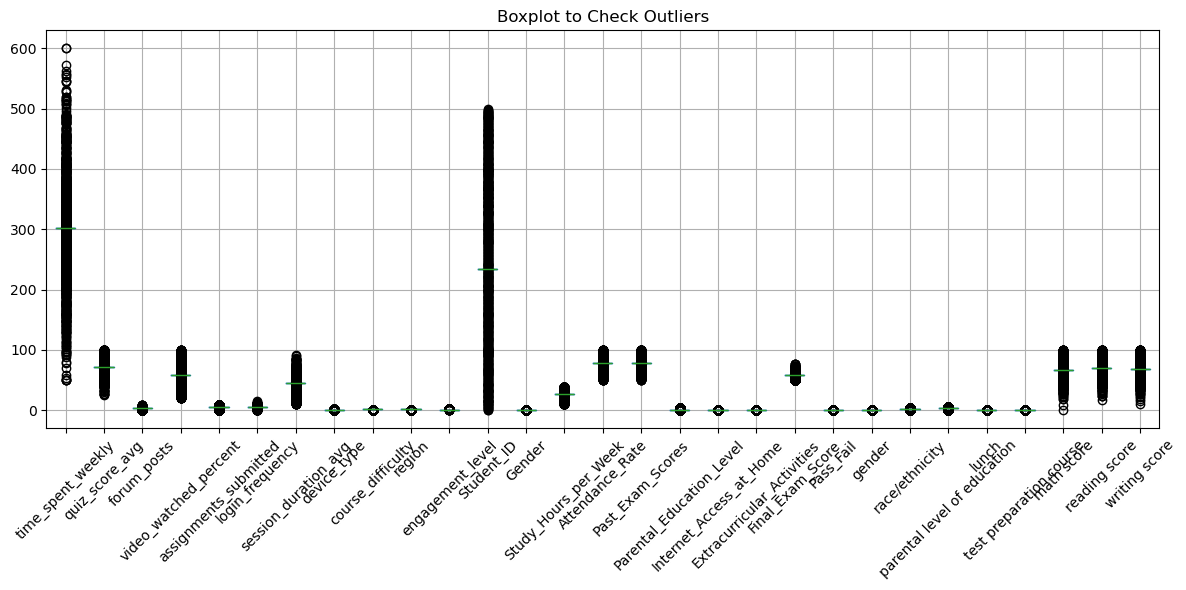

In [14]:
# Basic boxplot for the entire DataFrame (numeric columns only)
df.boxplot(figsize=(12, 6), rot=45)
plt.title("Boxplot to Check Outliers")
plt.tight_layout()
plt.show()


### Features selection

In [32]:
X = [
    'time_spent_weekly',
    'quiz_score_avg',
    'forum_posts',
    'video_watched_percent',
    'math score',               # OR use 'reading score' (choose one)
    'session_duration_avg'
]

### Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[X])

### PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### K-Mean

In [53]:
# K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca) 

In [54]:
kmeans.fit_predict(X_pca)

array([1, 1, 0, ..., 0, 0, 0])

In [55]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.654


### Elbow Method

In [56]:
# elbow method to find optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

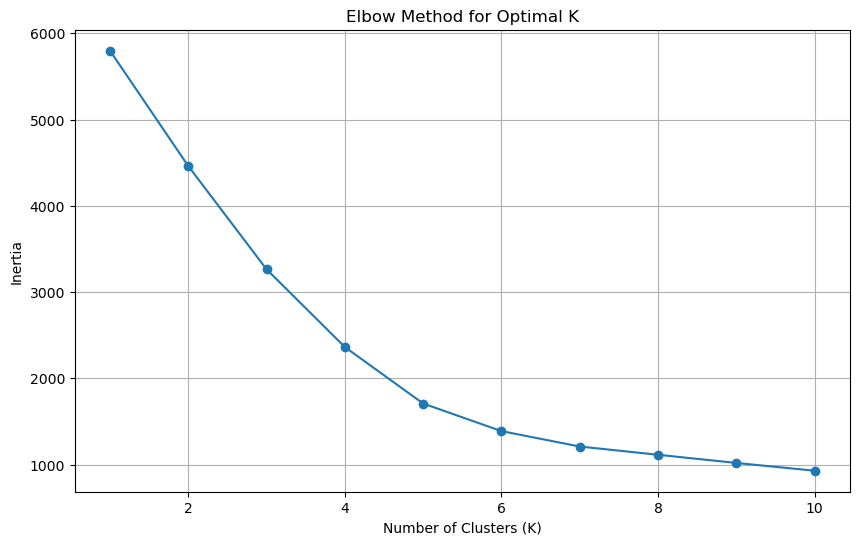

In [57]:
# Visualize by matplot 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o') 
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

### Lebel the cluster 

In [58]:
cluster_labels = {
    0: 'Visual Learners',
    1: 'Slow Learners',
    2: 'Fast Responders'
}

df['Learner_Type'] = df['Cluster'].map(cluster_labels)

### Save the model

In [59]:
import joblib
# Save the model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [60]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [70]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [71]:
print(df.groupby('Cluster')[[
    'time_spent_weekly',
    'quiz_score_avg',
    'forum_posts',
    'video_watched_percent',
    'math score',
    'session_duration_avg'
]].mean())


         time_spent_weekly  quiz_score_avg  forum_posts  \
Cluster                                                   
0               307.247637       69.563027     3.027946   
1               334.641140       71.190158     1.657143   
2               227.586118       81.256631     3.702899   

         video_watched_percent  math score  session_duration_avg  
Cluster                                                           
0                    60.133762      66.089             43.886451  
1                    44.197024      66.089             54.259149  
2                    66.458028      66.089             37.045976  


In [ ]:
cluster_labels = {
    0: 'Visual Learners',
    1: 'Slow Learners',
    2: 'Fast Responders'
}

In [74]:
joblib.dump(cluster_labels, 'cluster_labels.pkl')


['cluster_labels.pkl']